In [1]:
using BenchmarkTools
using Plots

In [2]:
function naive_multiplication(x::Int, y::Int)::Int
    x_digits = digits(x, base=2)
    y_digits = digits(y, base=2)
    result = 0
    
    for i in 1:length(y_digits)
        for j in 1:length(x_digits)
            result += (x_digits[j] * y_digits[i]) << (i + j - 2)
        end
    end
    return result
end


naive_multiplication (generic function with 1 method)

In [3]:
function karatsuba(number1::Int, number2::Int)::Int
    if number1 < (1 << 16) || number2 < (1 << 16)
        return naive_multiplication(number1, number2)
    end
    
    n = max(floor(Int, log2(number1) + 1), floor(Int, log2(number2) + 1))
    half = div(n, 2)
    
    high_n1, low_n1 = number1 >> half, number1 & ((1 << half) - 1)
    high_n2, low_n2 = number2 >> half, number2 & ((1 << half) - 1)
    
    x = karatsuba(high_n1, high_n2)
    y = karatsuba(low_n1, low_n2)
    z = karatsuba((low_n1 + high_n1), (low_n2 + high_n2))
    
    return (x << (2 * half)) + ((z - x - y) << half) + y
end

karatsuba (generic function with 1 method)

In [4]:
function plot_comparison(D, regular_times, karatsuba_times)
    regular_times_us = [t * 1e6 for t in regular_times]
    karatsuba_times_us = [t * 1e6 for t in karatsuba_times]
    
    p = plot(
        D, regular_times_us,
        label="Обычное умножение",
        color=:blue,
        marker=:circle,
        linewidth=2,
        xlabel="Размерность числа (биты)",
        ylabel="Время (мкс)",
        title="Сравнение методов умножения",
        legend=:topleft,
        grid=true,
        size=(600, 400)
    )
    
    plot!(
        p, D, karatsuba_times_us,
        label="Карацуба",
        color=:red,
        marker=:square,
        linewidth=2
    )
    
    display(p)
end


function generate_large_number(bits::Int)::Int
    return rand(2^(bits-1):2^bits - 1)
end

generate_large_number (generic function with 1 method)

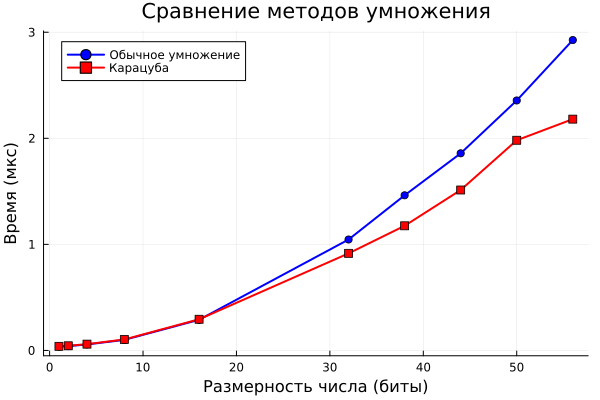

In [5]:
regular_times = []
karatsuba_times = []
D = [1, 2, 4, 8, 16, 32, 38, 44, 50, 56]

for digits in D
    x = generate_large_number(digits)
    y = generate_large_number(digits)
    
    regular_time = @belapsed naive_multiplication($x, $y)
    karatsuba_time = @belapsed karatsuba($x, $y)
    
    push!(regular_times, regular_time)
    push!(karatsuba_times, karatsuba_time)
end

plot_comparison(D, regular_times, karatsuba_times)